## 1- First Imported Needed Libraries

In [34]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd  
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## 2- Read Iris Data & Plotting Data

C:\Users\Alhou\AppData\Local\Temp\ipykernel_1160\4049406793.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  iris.Species = iris.species.replace(to_replace=['setosa', 'versicolor'], value=[0, 1])


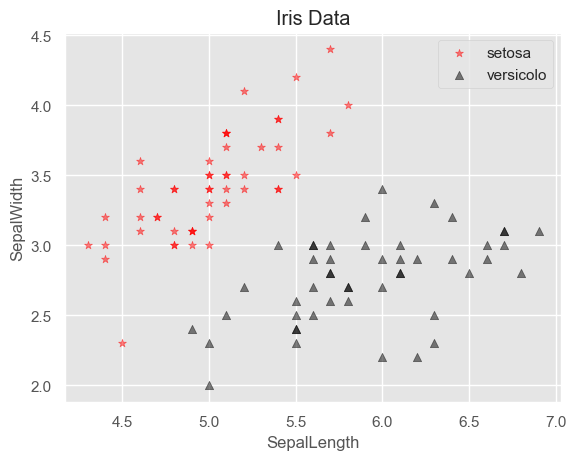

In [35]:
iris = pd.read_csv('D:\\AI\\11 القسم الحادي عشر  تنسر فلو و كيراس TensorFlow & Keras\Materials\\TF_Files-master\\2.2_GDO\\dataset.csv')
iris = iris[:100]
plt.style.use('ggplot')
ax=plt.axes()
ax.set(xlabel='SepalLength',ylabel='SepalWidth',title ='Iris Data')
iris.Species = iris.species.replace(to_replace=['setosa', 'versicolor'], value=[0, 1])
plt.scatter(iris[:50].sepal_length, iris[:50].sepal_width, color = 'red',alpha=0.5,marker='*',label='setosa')
plt.scatter(iris[51:].sepal_length, iris[51:].sepal_width,color ='black',alpha=0.5, marker = '^',label='versicolo')
plt.legend(loc='best')

## 3- Dropping Some Of Features From Data  

In [36]:
X = iris.drop(labels=['species'], axis=1).values
y = iris.Species.values

## 4- set seed for numpy and tensorflow & set for reproducible results

In [37]:
seed = 5
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)
# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)
# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
print('\t\t The Random Values Of Training Index Data \n',train_index)
print('***'*30)
print('The Random Values Of Test Index Data Is ==> ',test_index)
print('**'*40)
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]
print('The Random Values Of X Training Index Are : \n',train_X[:5])
print('***'*40)
print('The Random Values Of y Training Index Are : \n',train_y)
print('***'*40)
print('The Random Values Of X Test Index Are : \n',test_X[:5])
print('***'*40)
print('The Random Values Of Y Test Index Are ==> ',test_y)
print('***'*40)

		 The Random Values Of Training Index Data 
 [66 32 46 28 74 23 10 20 17 35 97 37 70 40 60 34 42 57 12 69 94 56 22 39
 24 13 63 71 55 87  6 88 64 26 48 50 72 54 21 25 33 29 52 14 85 79 95  3
 43 11 98 45 83 67 89 86 49 82 59 19 81 38 68  2 31 84 51 36  4  0 58  5
 96  1 93 41  9 18 91 47]
******************************************************************************************
The Random Values Of Test Index Data Is ==>  [ 7  8 15 16 27 30 44 53 61 62 65 73 75 76 77 78 80 90 92 99]
********************************************************************************
The Random Values Of X Training Index Are : 
 [[5.6 3.  4.5 1.5]
 [5.2 4.1 1.5 0.1]
 [5.1 3.8 1.6 0.2]
 [5.2 3.4 1.4 0.2]
 [6.4 2.9 4.3 1.3]]
************************************************************************************************************************
The Random Values Of y Training Index Are : 
 [1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0

## 5- Define the normalized function

In [39]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)
# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

## 6- Begin building the model framework

In [40]:
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (4, 1)
tf.compat.v1.disable_eager_execution()
A = tf.Variable(tf.compat.v1.random_normal(shape=[4, 1]))
b = tf.Variable(tf.compat.v1.random_normal(shape=[1, 1]))
init = tf.compat.v1.global_variables_initializer()
s2 = tf.compat.v1.keras.backend.get_session()
s2.run(init)
# Define placeholders
data = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1])
# Declare the model you need to learn
mod = tf.matmul(data, A) + b

## 7- Make Cost Function & Create GDO

In [41]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.compat.v1.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 1500
#=================================================================================================
# Define the optimizer
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss) 
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.compat.v1.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.compat.v1.reduce_mean(correct)
# End of the definition of the model framework

## 8- Start training model

In [42]:
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []
# training model
for epoch in range(iter_num):
    # Generate random batch index
     batch_index = np.random.choice(len(train_X), size=batch_size)
     batch_train_X = train_X[batch_index]
     batch_train_y = np.matrix(train_y[batch_index]).T
     s2.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
     temp_loss = s2.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
     temp_train_acc = s2.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
     temp_test_acc = s2.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
     loss_trace.append(temp_loss)
     train_acc.append(temp_train_acc)
     test_acc.append(temp_test_acc)
    # output
     if (epoch + 1) % 300 == 0: 
         print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1,temp_loss,temp_train_acc,temp_test_acc))


epoch:  300 loss: 1.024535 train_acc: 0.537500 test_acc: 0.350000
epoch:  600 loss: 0.801513 train_acc: 0.537500 test_acc: 0.350000
epoch:  900 loss: 0.720040 train_acc: 0.537500 test_acc: 0.350000
epoch: 1200 loss: 0.539354 train_acc: 0.575000 test_acc: 0.400000
epoch: 1500 loss: 0.465075 train_acc: 0.887500 test_acc: 0.900000


## 9 - Plotting Data

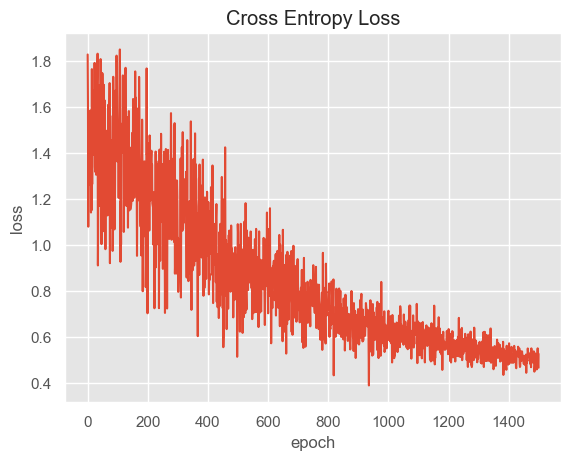

In [43]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

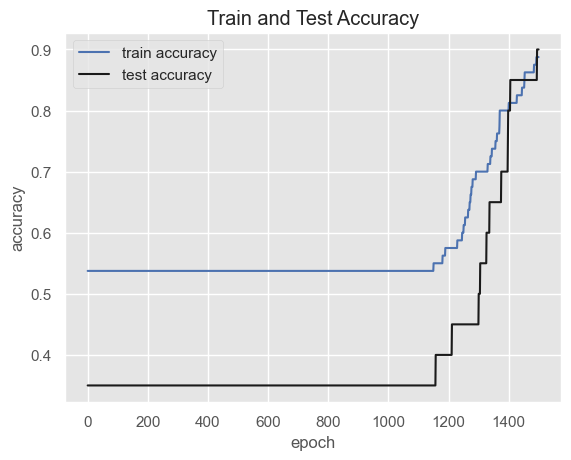

In [44]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()